# Python Exam (Masters/DU, 2024): Bees Dynamics Analysis

> + **Allocated time:** 1h30
> + **Drop your final notebook** *renamed with your family name* at the end of the exam on this [page](https://cernbox.cern.ch/s/CJr5MMZg1Jz223G)
> + **Allowed documents:** documentation of [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [scipy](https://docs.scipy.org/doc/scipy/reference/) as well as the documentation from the notebook interface using `Shift+tab` keyboard shortcut, `help(module)` or `help(function)`.
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code.

## General informations

### Data description

This exam proposes to analyze data describing the 2D motion of a system of two bees, in different situations. These data were generated by a numerical simulation with tunable parameters, such as an attraction force between the two bees, the presence of a field of flowers (attracting the bees too), or some random noise in the trajectory of each bees. More precisely, the following parameters will be considered:
 + `BOX`       : if enable, there is a box (*i.e.* a limited area) in which the bees can live (bees are simply reflected when hiting a wall of the box)
 + `LBOX`      : length of the box, which is chooser to be a square
 + `ATTRACTION`: if enable, bees attract each other (spring force)
 + `g_ATTRA`   : strenght of the mutual attraction
 + `FIELD`     : if enable, there is a field of flowers organised on a regular lattice
 + `g_FIELD`   : strengh of individual flowers attraction
 + `NOISE`     : if enable, some random noise is added in individual bee trajectories
 
*N.B.* For this exam, there is need to know the exact mathematical definition of these coefficients, and the exact equations describing the various forces.

The data will contain the following variables:
 + time (in ms) : `tms`
 + x-position of bee 1 and bee 2: `Rx1` and `Rx2`
 + y-position of bee 1 and bee 2: `Ry1` and `Ry2`
 + x- and y- velocities of bee 1 and bee 2 : `Vx1`, `Vx2`, `Vy1`, `Vy2`


### Exam organisation

The first section of the exam proposes to study data that were already generated, while the second part of the exam focuses on data generation using an external module, in order to see how the model parameters affect the system.

### Import packages and plot cosmetics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 1. Analyzing existing data [10 + 2 bonus pts]

**1.1 [2 pts]** The name of the dataset will following the structure `prefix_PARAMATER1-val1_PARAMETER2-val2..._RUN-runNumber.csv`, such as `beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-0_RUN-0.csv`, write a function `load_data()` that takes in argument the name of the csv file and return a dataframe corresponding to the data, and dictionnary storing the parameter simulation values `{param:val}`.

In [3]:
# Load data (both parameter and data):
def load_data(fname):
    '''
    Return a dictionnary based containing the value of each
    simulation parameter (based on the file name structure),
    and the dataframe.
    '''
    tmp = fname.replace('.csv', '').split('_')[1:]
    params = {}
    for p in tmp:
        par = p.split('-')
        params[par[0]] = float(par[1])
    
    return params, pd.read_csv(fname)

**1.2 [1 pts]** Load the dataframe corresponding to this csv file `beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-0_RUN-0.csv`. How many time values are used to describe the system ? *Using the numpy array* behind the pandas serie `tms`, compute the mean and the standard deviation of the time steps. What do you conclude ? 

*Reminder:* to get the numpy array associated a dataframe variable, just do `array = df['variable'].values`

In [4]:
# Load data
p1, d1 = load_data('beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-0_RUN-0.csv')

# Print the number of entries
print(f'There are {d1.shape[0]} times values')

# Check the numbers of time step values
ts = d1.tms.values
dts = ts[1:] - ts[:-1]
print(f'The time step {dts.mean()} +/- {dts.std()}')

There are 50001 times values
The time step 0.05 +/- 1.3458101063098808e-13


**1.3 [1 pts]** Plot the trajectories of the two bees on the same plot.

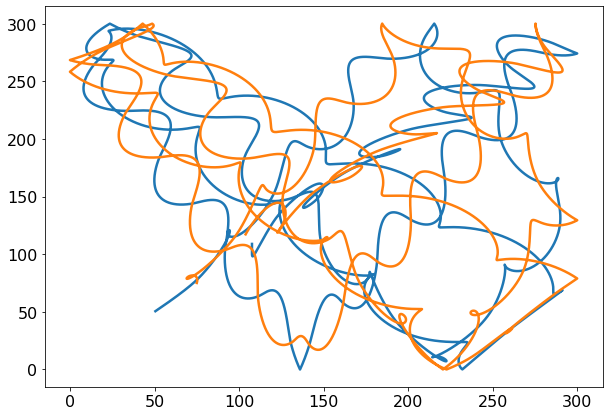

In [5]:
plt.plot(d1.Rx1, d1.Ry1)
plt.plot(d1.Rx2, d1.Ry2);

**1.4 [1 pts]** Add a new column to the dataframe, containing the distance between the two bees. Plot the distance `R12` between the 2 bees as function of time. 
*Reminders* : Disance between points $\sqrt{(r_{x, 1} - r_{x,2})^2 + (r_{y,1}-r_{y,2})^2}$

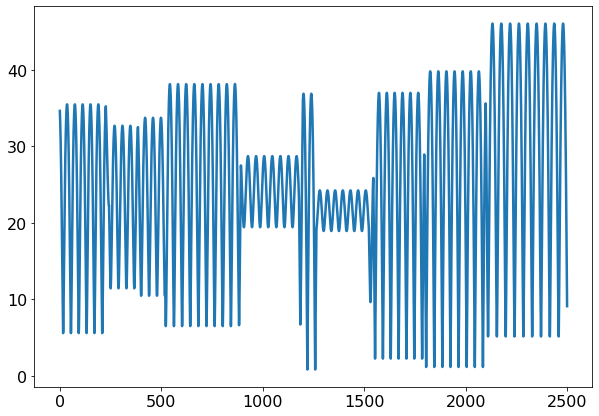

In [6]:
d1['R12'] = np.sqrt( (d1.Rx1 - d1.Rx2)**2 + (d1.Ry1 - d1.Ry2)**2 )
plt.plot(d1.tms, d1.R12);

**1.5 [2pts]** We would like to understand how position and velocities are correlated between bee 1 and bee 2. Compute the velocity $\sqrt{v_x^2 + v_y^2}$ and the position $\sqrt{r_x^2 + r_y^2}$, for each bee. Produce a plot of $r_1$ versus $r_2$ and another plot $v_1$ versus $v_2$. What would you conclude about how correlated are bee 1 and 2?

In [7]:
# Adding the four variables to the dataframe
for ib in ['1', '2']:
    for var in ['R', 'V']:
        d1[f'{var}{ib}'] = np.sqrt(d1[f'{var}x{ib}']**2 + d1[f'{var}y{ib}']**2)

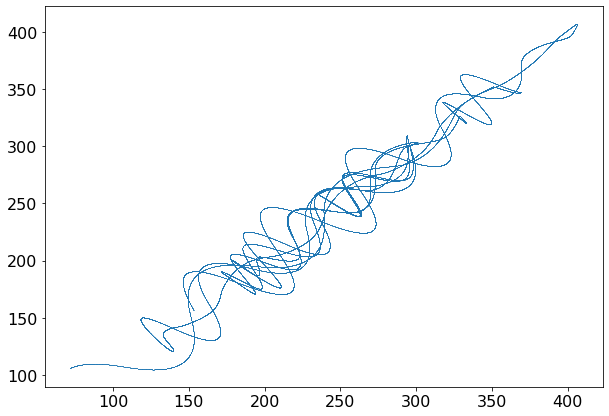

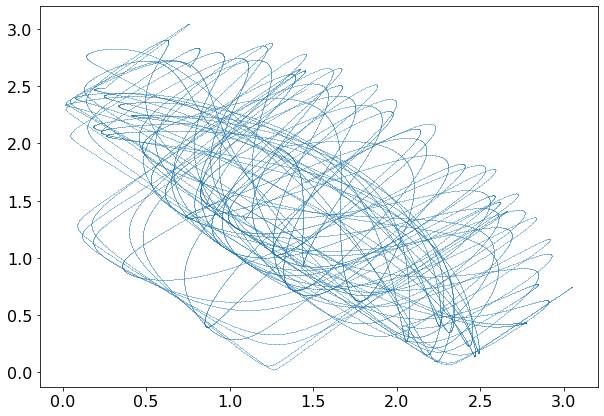

In [8]:
# Make the position plot
plt.figure()
plt.scatter(d1.R1, d1.R2, s=0.3, linewidth=0);

# Make the velocity plot
plt.figure()
plt.scatter(d1.V1, d1.V2, s=0.3, linewidth=0);

**BONUS QUESTION [2pts]**. Find the total duration (in milliseconds), and fraction of time for which the bees are close to each other, *i.e.* with a distance lower then 5.

In [9]:
# Define the distance between the 2 bees
d1.R12 = np.sqrt( (d1.Rx1-d1.Rx2)**2 + (d1.Ry1-d1.Ry2)**2 )

# Get the numpy arrays
R12 = d1.R12.values
Tms = d1.tms.values

# Define a mask based on R12<5, applied to time
Tclose = Tms[R12<5]

# Total duration = number of steps * step value
T = Tclose.size * 0.05
f = T/Tms[-1] * 100
print(f'The 2 bees are closed to each other during {Tclose.size * 0.05:.0f} ms, representing {f:0.1f} %')

The 2 bees are closed to each other during 43 ms, representing 1.7 %


**1.5 [3pts]** We will now work with an additional simulation setups, with noise in the bee motion ((while the previous one was without noise) : 
 + no noise (previous dataset): `beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-0_RUN-0.csv`
 + noise (new dataset): `beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-1_RUN-2.csv`
 
*a.* After loading the new dataset, plot the trajectory of the bee 1 with and without noise on the same plot. 

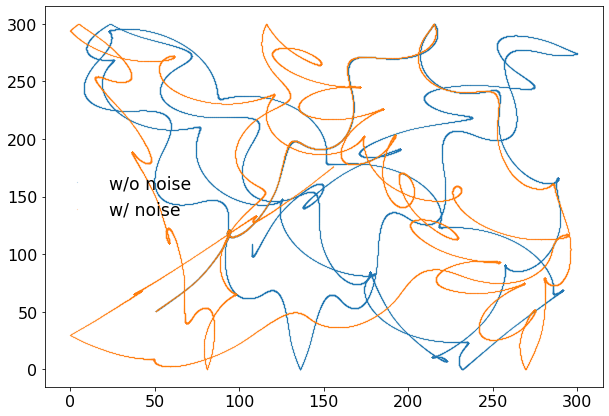

In [10]:
# Load dataset with noise
p2, d2 = load_data('beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-1_RUN-2.csv')

# Produce the plot
plt.plot(d1.Rx1, d1.Ry1, 'o', markersize=0.1, label='w/o noise')
plt.plot(d2.Rx1, d2.Ry1, 'o', markersize=0.1, label='w/ noise')
plt.legend();

*b.* Plot the noise contribution as function of time, defined as $\mathcal{O}_{noise} - \mathcal{O}$  for each observable $\mathcal{O}$ being {$x_1$, $x_2$, $y_1$, $y_2$, $v_{x, 1}$, $v_{x, 2}$, $v_{y, 1}$, $v_{y, 2}$}. *Hint:* copy-paste of code is highly *not* recommanded.

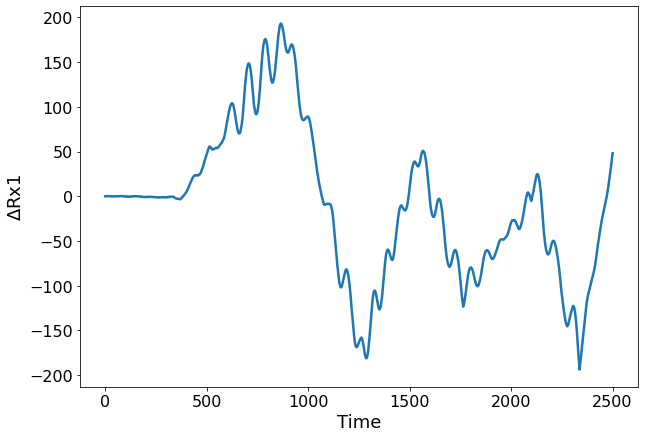

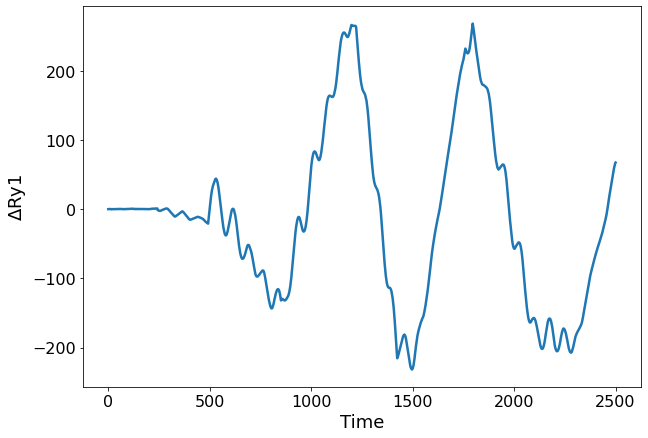

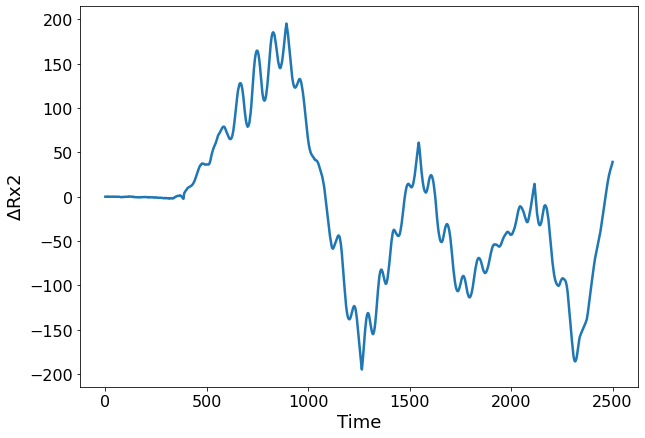

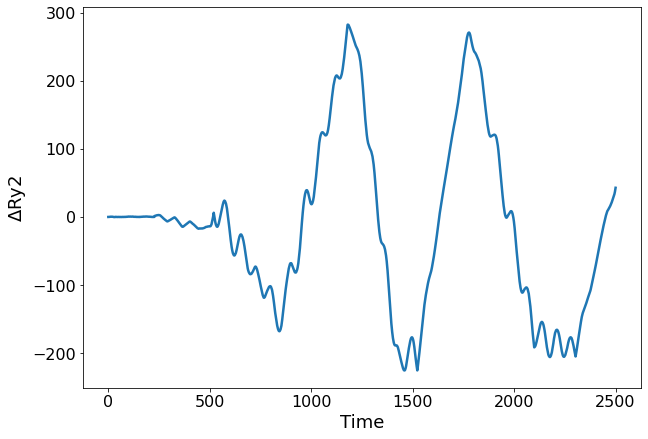

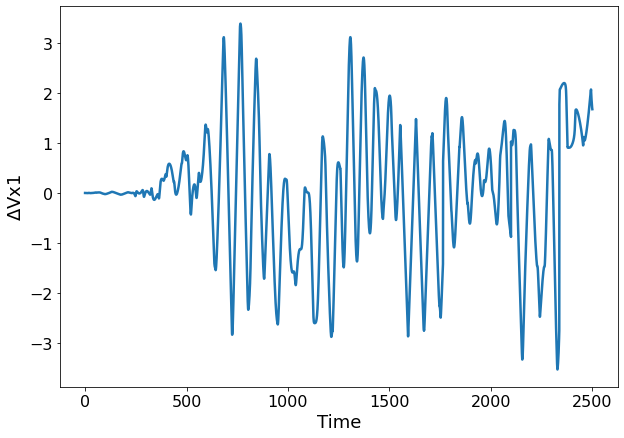

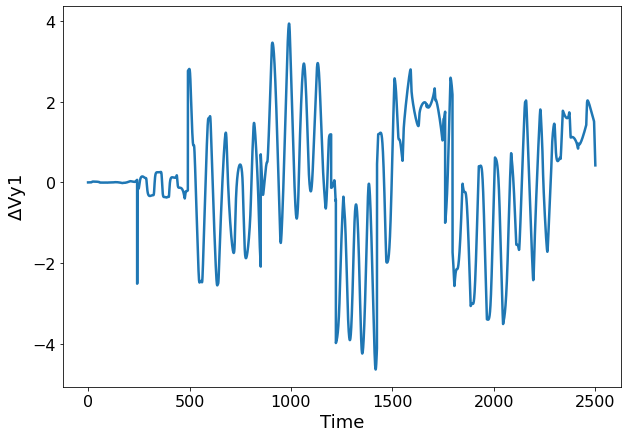

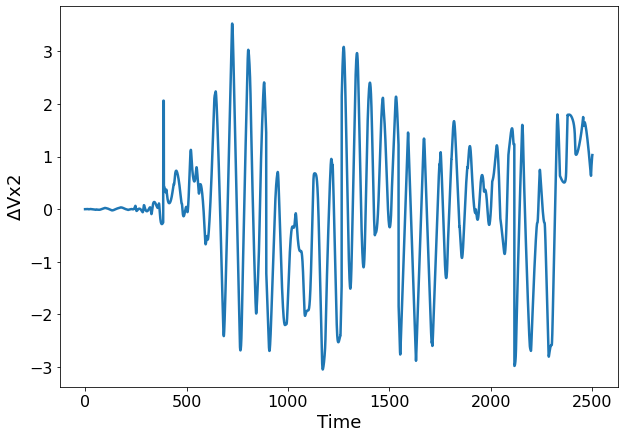

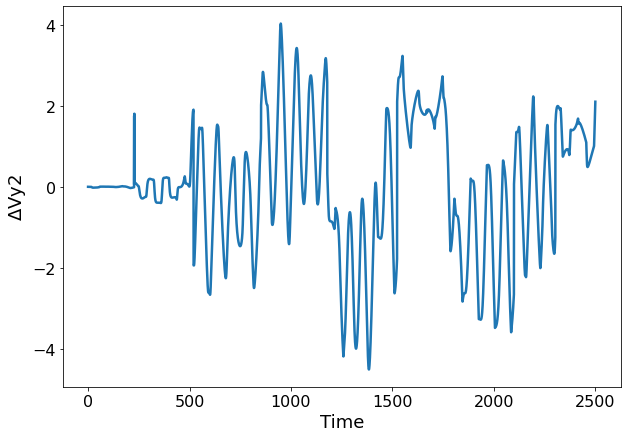

In [11]:
# Get an array of variable to loop over it
cols = d2.columns.values[1:]

# Loop over it
for col in cols:
    delta = d2[col] - d1[col]
    plt.figure()
    plt.plot(d1.tms, delta)
    plt.xlabel('Time')
    plt.ylabel(f'$\\Delta${col}')

*c.* Plot the histogram of the distance introduced by the noise (defined as $|\vec{r}_{1, noise} - \vec{r}_{1}|$), for the bee 1. Do the same for the bee 2 and overlay the two histograms. Is the noise similar for the two bees ?

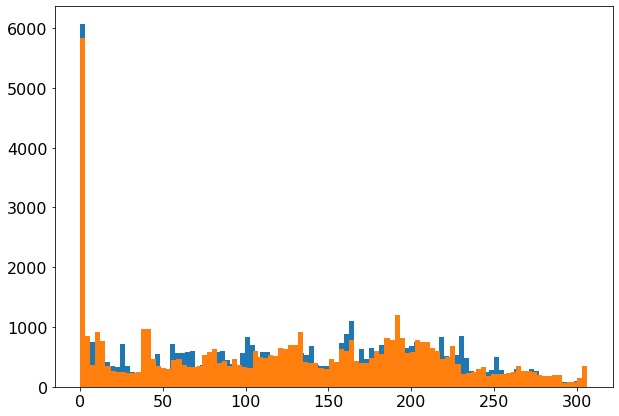

In [12]:
dR1 = np.sqrt( (d2.Rx1-d1.Rx1)**2 + (d2.Ry1-d1.Ry1)**2 )
dR2 = np.sqrt( (d2.Rx2-d1.Rx2)**2 + (d2.Ry2-d1.Ry2)**2 )

plt.hist(dR1, bins=100)
plt.hist(dR2, bins=100);

## 2. Simulating data using an external package [10 + 2 bonus pts]

**2.1 [1pts]** Import the external package `bees_simulation.py` as `bs` and run a simulation using the function `run_bees_simulation` using the exact same setup as in question **1.2** (*ie* `noise=0, field=0`), but *with a number steps of 10000*. Make sure the two dataframes are identical plotting for example the difference of the two x-positions of bee 1, as function of time. 

*Hint:* the documentation of a function can be obtained using `Shift+Tab`. You can use the argument `run` to make sure you can identify your newly generated sample.

In [13]:
import bees_simulation as bs
bs.run_bees_simulation(steps=10000, noise=0, field=0, run=10);

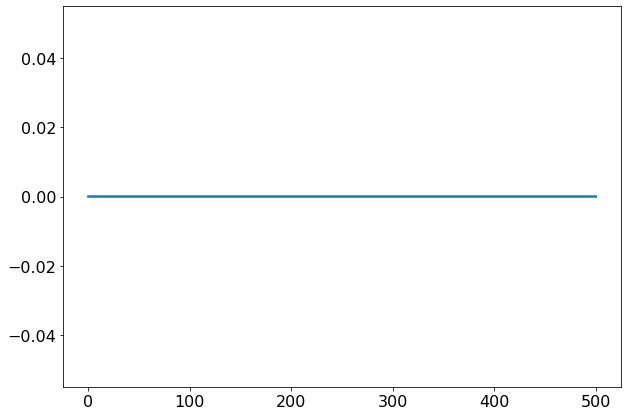

In [14]:
_, d1bis = load_data('beesMotion_BOX-1_LBOX-300_ATTRACTION-1_gATTRA-0.10_FIELD-0_gFIELD-2.80_NOISE-0_RUN-10.csv')
plt.plot(d1.tms, d1bis.Rx1 - d1.Rx1);

**2.2 [1pts]** Generate simulations with 10000 steps (without noise) enabling a flowers field, for 3 different interaction strengh values `g_FIELD`, namely `0.0`, `2.8` and `5`.

In [17]:
datas = []
for g in [0.0, 2.8, 5]:
    n = bs.run_bees_simulation(steps=10000, noise=0, field=1, g_field=g)
    _, d = load_data(n)
    datas.append(d)

**2.3 [1 pts]** Overlay the bee 1 trajectory of each simulation on the same plot, with a proper legend speficying which trajectory corresponds to which `g_FIELD` value.

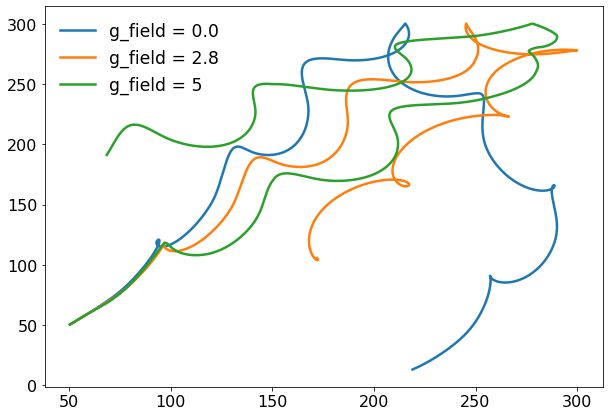

In [19]:
for d, n in zip(datas, [0.0, 2.8, 5]):
    plt.plot(d.Rx1, d.Ry1, label=f'g_field = {n}')
plt.legend();

**2.3 [2 pts]** Write a function which takes two datasets (*i.e.* two simulation setups) and plot two quantities as function of time: 
  1. difference between the 2 datasets, of the distances between bees $r_{12} = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$;
  2. difference between the 2 datasets, of the mean velocity of the two bees $v_{12} = |\frac{1}{2}(\vec{v}_1 + \vec{v}_2)|$
  
Test it on the data sets with `g_FIELD=0` and `g_FIELD=5`.

In [22]:
def plot_diff(data1, data2):
    
    # Distance between bees
    plt.figure()
    r12_d1 = np.sqrt( (data1.Rx2-data1.Rx1)**2 + (data1.Ry2-data1.Ry1)**2)
    r12_d2 = np.sqrt( (data2.Rx2-data2.Rx1)**2 + (data2.Ry2-data2.Ry1)**2)
    plt.plot(data1.tms, r12_d1 - r12_d2)
    
    # Mean velocity
    plt.figure()
    v12_d1 = 0.5 * np.sqrt( (data1.Vx1+data1.Vx2)**2 + (data1.Vy1+data1.Vy1)**2)
    v12_d2 = 0.5 * np.sqrt( (data2.Vx1+data2.Vx2)**2 + (data2.Vy1+data2.Vy2)**2)
    plt.plot(data1.tms, v12_d1 - v12_d2)

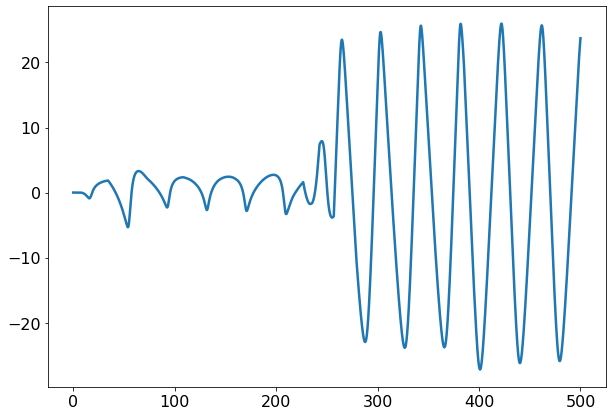

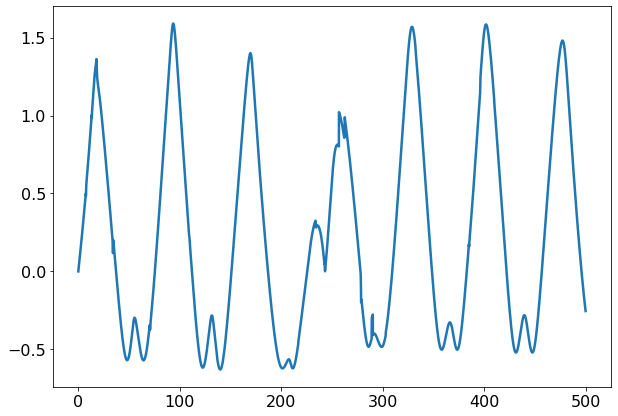

In [24]:
plot_diff(datas[0], datas[2])

**BONUS QUESTION [2pts]** Generalize this function to an arbitrary number of datasets. In that case, the first dataset will be used as reference (*i.e.* the differences will be always computed with respect to the first dataset). You can test it taking all the dataset you have generated, plus the ones which are provided.

In [29]:
def plot_diff_manydata(*datas):
    
    # Reference data
    dref = datas[0]
    r12_ref = np.sqrt( (dref.Rx2-dref.Rx1)**2 + (dref.Ry2-dref.Ry1)**2)
    v12_ref = 0.5 * np.sqrt( (dref.Vx1+dref.Vx2)**2 + (dref.Vy1+dref.Vy1)**2)
    
    # Distance between bees
    plt.figure()
    for d in datas[1:]:
        r12_d = np.sqrt( (d.Rx2-d.Rx1)**2 + (d.Ry2-d.Ry1)**2)
        plt.plot(dref.tms, r12_d - r12_ref)

    # Velocities
    plt.figure()
    for d in datas[1:]:
        v12_d = 0.5 * np.sqrt( (d.Vx2+d.Vx1)**2 + (d.Vy2+d.Vy1)**2)
        plt.plot(dref.tms, v12_d - v12_ref)

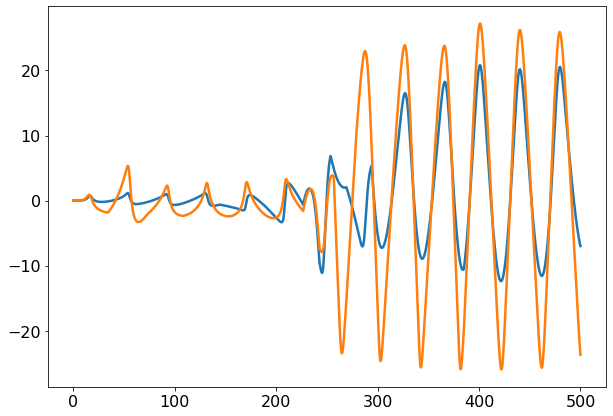

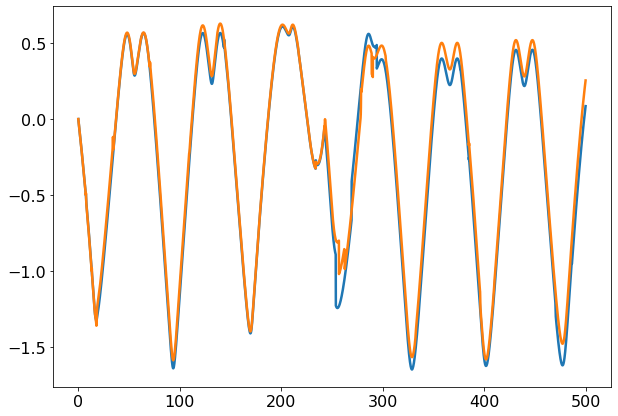

In [30]:
plot_diff_manydata(*datas)

**2.4 [2 pts]** Considering the simulation with `g_FIELD=5`, plot the histogram of the $v_x$ of the bee 1 only for times for which bee 1 and bee 2 are distant from at least 10. Overlay on the same plot the histogram of bee 1 velocities when bee 1 and bee 2 are now close to each other (distance lower than 10).

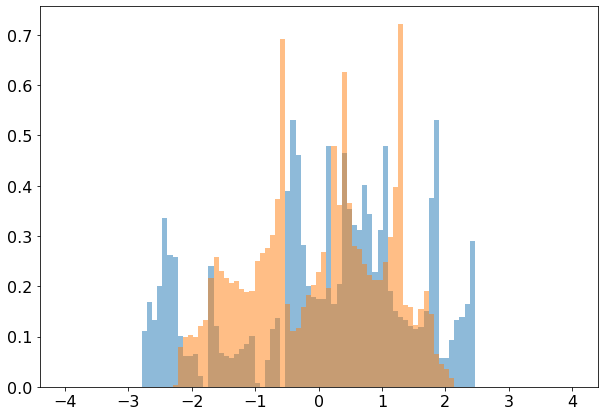

In [49]:
d = datas[2]
R12 = np.sqrt( (d.Rx1-d.Rx2)**2 + (d.Ry1-d.Ry2)**2 )

plt.hist(d.Vx1[R12<20], bins=np.linspace(-4, 4, 100), alpha=0.5, density=True)
plt.hist(d.Vx1[R12>20], bins=np.linspace(-4, 4, 100), alpha=0.5, density=True);

**2.5 [3 pts]** The goal of this last question is to study the impact of bees mutual attraction.

*a.* Generate three dataset with 10000 steps (no noise, with flowers lattice `g_FIELD=2.8`), and with three values of attraction strength `gATTRA`, namely `[0, 0.5, 2.0]`.

In [55]:
datas = []
for g in [0.0, 0.5, 2]:
    n = bs.run_bees_simulation(steps=10000, noise=0, field=1, g_field=2.8, g_attra=g)
    _, d = load_data(n)
    datas.append(d)

*b.* Produce one plot per dataset, showing the trajectories of the two bees each.

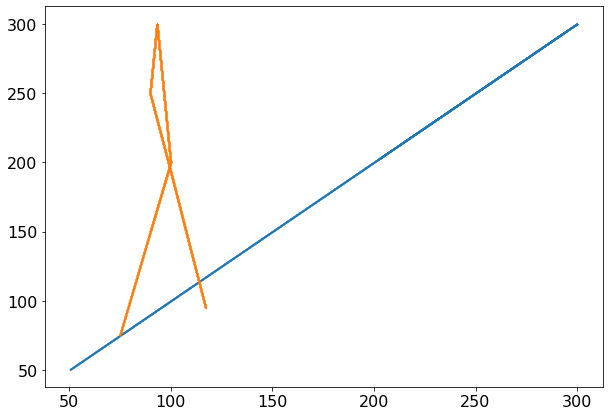

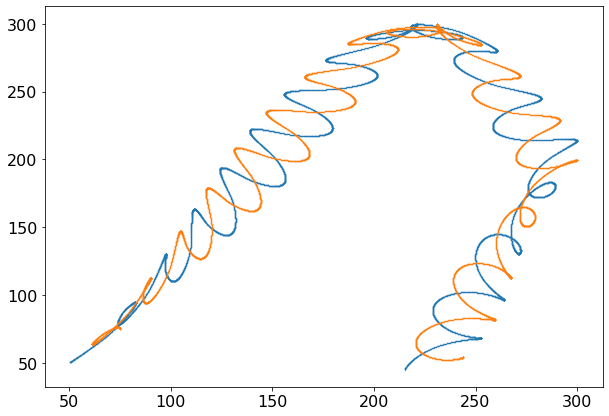

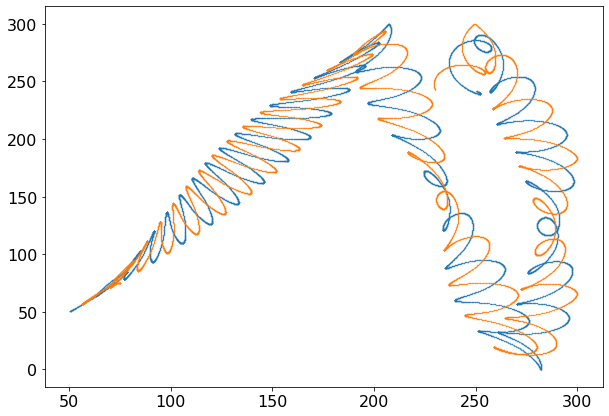

In [54]:
for d in datas:
    plt.figure()
    plt.scatter(d.Rx1, d.Ry1, s=0.1)
    plt.scatter(d.Rx2, d.Ry2, s=0.1)